# 01 Pandas II: Dates & Plotting

In [1]:
import pandas as pd

# Importing Data

In [2]:
df = pd.read_csv('scraped_and_cleand_six.csv')

# Looking at summary of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 7 columns):
Unnamed: 0     1169 non-null int64
Company        1169 non-null object
Date           1169 non-null object
Price          1169 non-null float64
Share Total    1169 non-null int64
Type           1169 non-null object
Price_m        1169 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 64.0+ KB


[Pandas data types, and Python data types](http://www.datacarpentry.org/python-ecology-lesson/03-data-types-and-format/)

## Now lets look at the dates

In [4]:
df['Date'].head()

0    30.10.2017
1    30.10.2017
2    30.10.2017
3    30.10.2017
4    27.10.2017
Name: Date, dtype: object

In [5]:
pd.to_datetime(df['Date'], format='%d.%m.%Y').head()

0   2017-10-30
1   2017-10-30
2   2017-10-30
3   2017-10-30
4   2017-10-27
Name: Date, dtype: datetime64[ns]

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 7 columns):
Unnamed: 0     1169 non-null int64
Company        1169 non-null object
Date           1169 non-null datetime64[ns]
Price          1169 non-null float64
Share Total    1169 non-null int64
Type           1169 non-null object
Price_m        1169 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 64.0+ KB


# Let's plot the transaction counts

[Code overview](http://benalexkeen.com/resampling-time-series-data-with-pandas/)

# First we need to make the date the index

In [8]:
df.index = df['Date']

In [9]:
df.head()

,Unnamed: 0,Company,Date,Price,Share Total,Type,Price_m
Date,,,,,,,
2017-10-30,0,ABB Ltd,2017-10-30,362229.0,14323,Purchase,0.4
2017-10-30,1,ABB Ltd,2017-10-30,304289.0,12032,Purchase,0.3
2017-10-30,2,ABB Ltd,2017-10-30,10060.0,500,Purchase,0.0
2017-10-30,3,ABB Ltd,2017-10-30,10060.0,500,Purchase,0.0
2017-10-27,4,Banque Cantonale Vaudoise,2017-10-27,10620.0,15,Purchase,0.0


In [13]:
df.resample('B')['Price'].mean().head(10)

Date
2017-01-03    203534.333333
2017-01-04     27428.000000
2017-01-05    158708.000000
2017-01-06     16051.666667
2017-01-09     11175.000000
2017-01-10      9210.000000
2017-01-11     72244.500000
2017-01-12    968264.300000
2017-01-13    206167.000000
2017-01-16     10815.000000
Freq: B, Name: Price, dtype: float64

## Lets plot that

In [ ]:
!pip install matplotlib

In [39]:
print(plt.style.available)

['dark_background', 'seaborn-talk', 'seaborn-colorblind', 'seaborn-ticks', 'ggplot', 'seaborn-pastel', 'seaborn-muted', 'bmh', 'seaborn-darkgrid', 'fivethirtyeight', 'seaborn-dark', 'seaborn-white', 'seaborn', 'seaborn-paper', 'seaborn-dark-palette', 'seaborn-poster', 'seaborn-whitegrid', 'seaborn-bright', '_classic_test', 'seaborn-deep', 'classic', 'grayscale', 'seaborn-notebook']


In [46]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

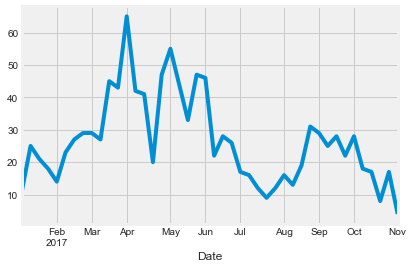

In [47]:
df.resample('W')['Date'].count().plot()

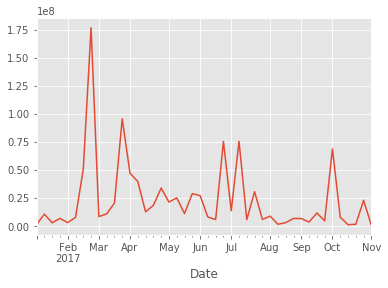

In [24]:
df.resample('W')['Price'].sum().plot()

In [21]:
df['Company'].value_counts()

nebag ag                                 57
Chocoladefabriken Lindt & Sprüngli AG    37
Vontobel Holding AG                      36
Credit Suisse Group AG                   30
Altin AG                                 27
LEM Holding SA                           25
Edisun Power Europe AG                   25
VZ Holding AG                            25
Bobst Group SA                           22
ams AG                                   21
SGS SA                                   21
Partners Group Holding AG                19
Schindler Holding AG                     19
Logitech International S.A.              19
u-blox Holding AG                        18
Burkhalter Holding AG                    18
Bossard Holding AG                       16
Leonteq AG                               15
Kühne + Nagel International AG           15
Lonza Group AG                           14
Bâloise Holding AG                       14
Komax Holding AG                         14
Banque Cantonale de Genève      

In [27]:
abb = df[df['Company'] == 'ABB Ltd']

In [28]:
abb

,Unnamed: 0,Company,Date,Price,Share Total,Type,Price_m
Date,,,,,,,
2017-10-30,0,ABB Ltd,2017-10-30,362229.0,14323,Purchase,0.4
2017-10-30,1,ABB Ltd,2017-10-30,304289.0,12032,Purchase,0.3
2017-10-30,2,ABB Ltd,2017-10-30,10060.0,500,Purchase,0.0
2017-10-30,3,ABB Ltd,2017-10-30,10060.0,500,Purchase,0.0
2017-06-02,419,ABB Ltd,2017-06-02,148260.0,6000,Sale,0.1
2017-03-15,928,ABB Ltd,2017-03-15,48582.0,2128,Sale,0.0
2017-03-15,929,ABB Ltd,2017-03-15,45993.0,2019,Sale,0.0
2017-03-15,930,ABB Ltd,2017-03-15,22960.0,1007,Sale,0.0
2017-03-15,931,ABB Ltd,2017-03-15,15549.0,679,Sale,0.0


# Shall we print this out?

In [31]:
abb.resample('B')['Price']

Date
2017-10-30    362229.0
2017-10-30    304289.0
2017-10-30     10060.0
2017-10-30     10060.0
2017-06-02    148260.0
2017-03-15     48582.0
2017-03-15     45993.0
2017-03-15     22960.0
2017-03-15     15549.0
2017-02-27    326076.0
2017-02-27    187037.0
Name: Price, dtype: float64

/Users/barneyjs/.virtualenvs/master/lib/python3.5/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736387.0, right=736387.0
  'left=%s, right=%s') % (left, right))


TypeError: Empty 'DataFrame': no numeric data to plot

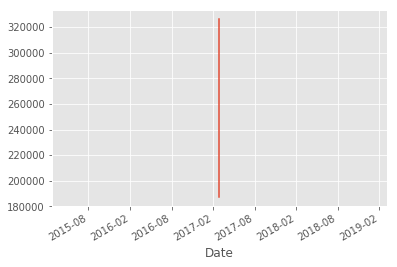

In [32]:
abb.resample('D')['Price'].plot()
plt.savefig('hello.jpg')

In [18]:
!ls

01 Pandas-Übung (Sven).ipynb         P3_GrantExport.csv
02 pandas II, dates & plotting.ipynb geckodriver.log
03 BeautifulSoup Übung.ipynb         hello.pdf
04 Selenium.ipynb                    scraped_and_cleand_six.csv


## But what about different shapes?

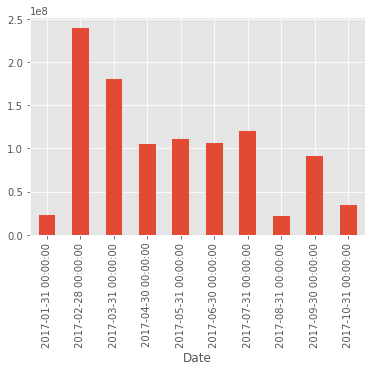

In [33]:
df.resample('M')['Price'].sum().plot(kind='bar')

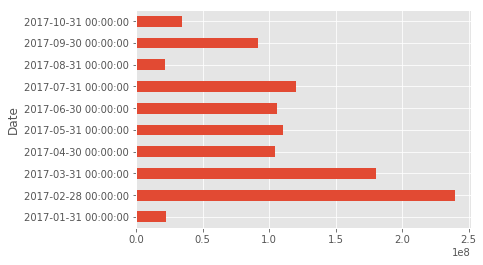

In [34]:
df.resample('M')['Price'].sum().plot(kind='barh')

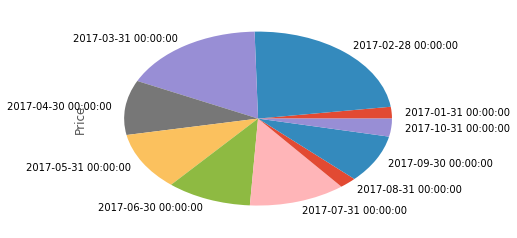

In [35]:
df.resample('M')['Price'].sum().plot(kind='pie')

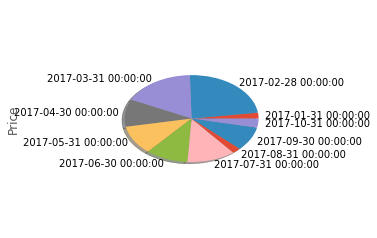

In [36]:
df.resample('M')['Price'].sum().plot(kind='pie', radius=0.5, shadow=True)

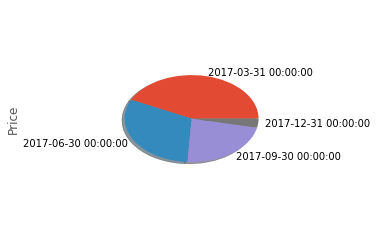

In [37]:
df.resample('Q')['Price'].sum().plot(kind='pie', radius=0.5, shadow=True)

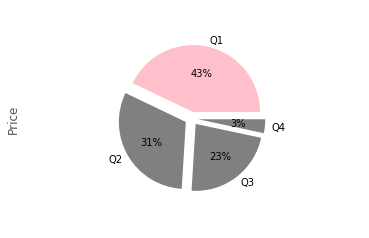

In [38]:
labels = 'Q1', 'Q2', 'Q3', 'Q4'
colors = ['pink', 'grey', 'grey', 'grey']
explode = (0.05, 0.05, 0.05, 0.05)
plt.axis('equal')
df.resample('Q')['Price'].sum().plot(kind='pie', radius=0.5, autopct='%0.0f%%', shadow=False, labels=labels,colors=colors, explode=explode)